In [55]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [56]:

df = pd.read_csv("./dirty_iris.csv").iloc[:, 1:]
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,NaN,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [57]:
# i
n = len(df)
summary = df.notnull().all(axis=1).value_counts()
complete_rows = summary[True]
print(f"Complete rows : {complete_rows}")
print(f"Percent of complete rows: {complete_rows/n * 100 : .3f}%")

Complete rows : 131
Percent of complete rows:  87.333%


In [58]:
# ii
NA = np.nan
df.fillna(NA, inplace=True)
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,NaN,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [59]:
#  iii
rules = [
    df["Species"].isin(["setosa", "versicolor", "virginica"]) ,
    ((df["Sepal.Length"] >= 0) & (df["Sepal.Width"] >= 0) & (df["Petal.Length"] >= 0) & (df["Petal.Width"] >= 0)) ,
    (df["Petal.Length"] >= 2*df["Petal.Width"]) ,
    (df["Sepal.Length"] <= 30) ,
    (df["Sepal.Length"] >  df["Petal.Length"])
]
rules

[0      False
 1       True
 2       True
 3       True
 4       True
        ...  
 145     True
 146     True
 147     True
 148     True
 149     True
 Name: Species, Length: 150, dtype: bool,
 0       True
 1       True
 2       True
 3       True
 4      False
        ...  
 145     True
 146     True
 147     True
 148     True
 149    False
 Length: 150, dtype: bool,
 0      True
 1      True
 2      True
 3      True
 4      True
        ... 
 145    True
 146    True
 147    True
 148    True
 149    True
 Length: 150, dtype: bool,
 0       True
 1       True
 2       True
 3       True
 4      False
        ...  
 145     True
 146     True
 147     True
 148     True
 149    False
 Name: Sepal.Length, Length: 150, dtype: bool,
 0       True
 1       True
 2       True
 3       True
 4      False
        ...  
 145     True
 146     True
 147     True
 148     True
 149    False
 Length: 150, dtype: bool]

Rule : 1
Violated 24 times
Rule : 2
Violated 19 times
Rule : 3
Violated 19 times
Rule : 4
Violated 19 times
Rule : 5
Violated 19 times


Text(0, 0.5, 'No of times violated')

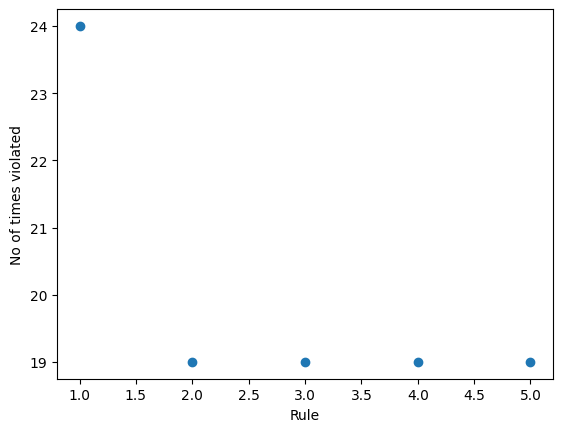

In [60]:
# vi)
rule_break = []
for i,rule in enumerate(rules):
    print(f"Rule : {i+1}")
    summary = df[rule].value_counts()
    count = len(summary)
    rule_break.append(n-count)
    print(f"Violated {n - count} times")

plt.scatter(np.arange(1,len(rule_break)+1), rule_break)
plt.xlabel("Rule")
plt.ylabel("No of times violated")

<Axes: >

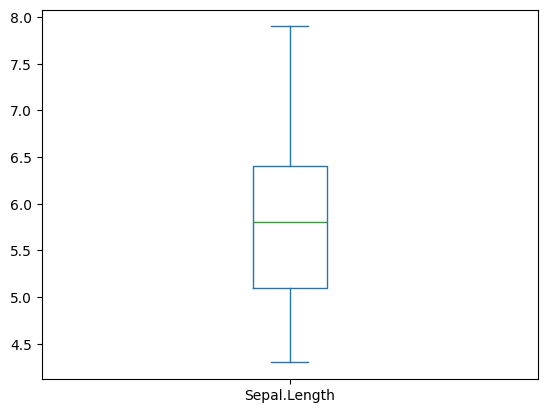

In [61]:
# v)
df["Sepal.Length"].plot.box()
# as such no outliers